In [ ]:
%pip install Pillow fortune-python

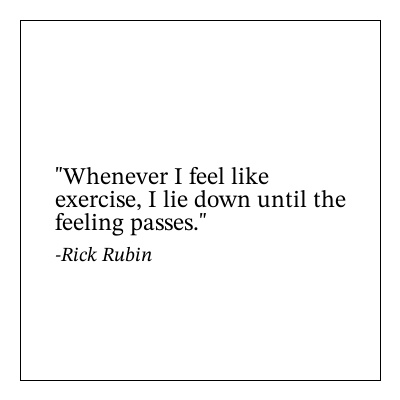

In [25]:
import os
import textwrap
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display
from fortune import fortune


def get_text_dimensions(text_string, font):
    ascent, descent = font.getmetrics()
    text_width = font.getmask(text_string).getbbox()[2]
    text_height = font.getmask(text_string).getbbox()[3] + descent
    return (text_width, text_height)


def gen_quote():
    """
    Generate a random quote, but only return a quote that is shorter than 100 characters
    """
    gen_fortune = fortune()
    while len(gen_fortune) > 100:
        gen_fortune = fortune()
    return gen_fortune


# Get a random quote
quote = gen_quote().strip().replace('\n', ' ').replace('\t', ' ').replace('\r', ' ')

while '  ' in quote:
    quote = quote.replace('  ', ' ')


# Create a white square, 400x400
resolution = (400, 400)
image = Image.new('RGB', resolution, color='white')

# Make a black square 5% from the edges. No fill, just the outline
draw = ImageDraw.Draw(image)
draw.rectangle([(resolution[0] * 0.05, resolution[1] * 0.05), (resolution[0] * 0.95, resolution[1] * 0.95)], outline='black')

# Most quotes are signed with "-- Author". Remove it.
quote = '"' + quote.split('--')[0] + '"'
author = "-Rick Rubin"

# Load a font, support Mac OS and Linux.
if os.uname().sysname == 'Darwin':
    quote_font = ImageFont.truetype("/System/Library/Fonts/Supplemental/STIXTwoText.ttf", 24)
    author_font = ImageFont.truetype("/System/Library/Fonts/Supplemental/STIXTwoText-Italic.ttf", 20)
elif os.uname().sysname == 'Linux':
    quote_font = ImageFont.truetype("/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf", 24)
    author_font = ImageFont.truetype("/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf", 20)

# Wrap the text to fit inside the black square
wrapped_quote = textwrap.fill(quote, width=30)

# Get the bounding box of the text
quote_bbox = draw.textbbox((0, 0), wrapped_quote, font=quote_font)
author_bbox = draw.textbbox((0, 0), author, font=author_font)

# Calculate the position of the text
quote_position = ((resolution[0] - (quote_bbox[2] - quote_bbox[0])) / 2, (resolution[1] - (quote_bbox[3] - quote_bbox[1])) / 2)

# Position the author below the quote, left-aligned
author_position = (quote_position[0], quote_position[1] + (quote_bbox[3] - quote_bbox[1]) + 10)

# Ensure the text fits within the black square
if quote_position[1] < resolution[1] * 0.05:
    quote_position = (quote_position[0], resolution[1] * 0.05)
    author_position = (author_position[0], quote_position[1] + (quote_bbox[3] - quote_bbox[1]) + 10)

# Draw the text
draw.text(quote_position, wrapped_quote, font=quote_font, fill='black')
draw.text(author_position, author, font=author_font, fill='black')

# Display the image
display(image)